In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

import scipy.stats as stats
%matplotlib inline


/Users/audreybaker/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
votes_2014 = pd.read_pickle('district_votes2014.pickle')
votes_2016 = pd.read_pickle('district_votes2016.pickle')
fec_2014 = pd.read_pickle('fec_2014.pickle')
fec_2016 = pd.read_pickle('fec_2016.pickle')

In [3]:
votes_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 5 columns):
state             260 non-null object
district          260 non-null float64
district_votes    260 non-null int64
candidates        260 non-null int64
year              260 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 12.2+ KB


In [4]:
fec_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 6 columns):
state            453 non-null object
district         453 non-null float64
receipts         453 non-null float64
disbursements    453 non-null float64
year             453 non-null int64
end_dollars      453 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.8+ KB


In [5]:
votes_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 5 columns):
state             242 non-null object
district          242 non-null float64
district_votes    242 non-null int64
candidates        242 non-null int64
year              242 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.3+ KB


In [6]:
fec_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 447
Data columns (total 6 columns):
state            448 non-null object
district         448 non-null float64
receipts         448 non-null float64
disbursements    448 non-null float64
year             448 non-null int64
end_dollars      448 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.5+ KB


In [7]:
house_2014 = pd.merge(votes_2014, fec_2014, on=('state','district'), how='left')

In [8]:
house_2014.head()

,state,district,district_votes,candidates,year_x,receipts,disbursements,year_y,end_dollars
0,AK,1.0,279743,3,2014,1095473.24,1108275.53,2014,-12802.29
1,AL,1.0,152234,2,2014,5431007.86,5081897.72,2014,349110.14
2,AL,2.0,167952,2,2014,1106979.56,827038.21,2014,279941.35
3,AL,3.0,156620,2,2014,1132552.22,966786.50,2014,165765.72
4,AL,4.0,134752,1,2014,1179691.95,914461.91,2014,265230.04


In [9]:
house_2016 = pd.merge(votes_2016, fec_2016, on=('state','district'), how='left')

In [10]:
house_2016.head()

,state,district,district_votes,candidates,year_x,receipts,disbursements,year_y,end_dollars
0,AK,1.0,308198,4,2016,1104111.86,1329619.09,2016,-225507.23
1,AL,1.0,215893,1,2016,1546236.65,1351224.44,2016,195012.21
2,AL,2.0,276584,2,2016,1673394.31,2126779.83,2016,-453385.52
3,AL,3.0,287104,2,2016,1213624.05,1145786.08,2016,67837.97
4,AL,4.0,239444,1,2016,1444641.38,1398066.99,2016,46574.39


In [11]:
house_2016 = pd.merge(votes_2016, fec_2016, on=('state', 'district'),how='left')

In [12]:
house_2016.head()

,state,district,district_votes,candidates,year_x,receipts,disbursements,year_y,end_dollars
0,AK,1.0,308198,4,2016,1104111.86,1329619.09,2016,-225507.23
1,AL,1.0,215893,1,2016,1546236.65,1351224.44,2016,195012.21
2,AL,2.0,276584,2,2016,1673394.31,2126779.83,2016,-453385.52
3,AL,3.0,287104,2,2016,1213624.05,1145786.08,2016,67837.97
4,AL,4.0,239444,1,2016,1444641.38,1398066.99,2016,46574.39


In [13]:
df_house = pd.concat([house_2014, house_2016])
del df_house['year_x']

In [14]:
df_house.rename(columns={'year_y':'year'})

,state,district,district_votes,candidates,receipts,disbursements,year,end_dollars
0,AK,1.0,279743,3,1095473.24,1108275.53,2014,-12802.29
1,AL,1.0,152234,2,5431007.86,5081897.72,2014,349110.14
2,AL,2.0,167952,2,1106979.56,827038.21,2014,279941.35
3,AL,3.0,156620,2,1132552.22,966786.50,2014,165765.72
4,AL,4.0,134752,1,1179691.95,914461.91,2014,265230.04
5,AL,5.0,154974,2,699720.54,458018.98,2014,241701.56
6,AL,6.0,178449,2,6602822.02,6680212.68,2014,-77390.66
7,AL,7.0,135899,1,1533119.05,1489260.70,2014,43858.35
8,AR,1.0,196256,3,1236521.91,992784.00,2014,243737.91
9,AR,2.0,237330,3,4848934.48,4852493.54,2014,-3559.06


In [15]:
df_house['statedist'] = df_house['state']+ ' - '+ df_house['district'].map(str)

In [16]:
df_house.dtypes

state              object
district          float64
district_votes      int64
candidates          int64
receipts          float64
disbursements     float64
year_y              int64
end_dollars       float64
statedist          object
dtype: object

In [17]:
df_house.head()

,state,district,district_votes,candidates,receipts,disbursements,year_y,end_dollars,statedist
0,AK,1.0,279743,3,1095473.24,1108275.53,2014,-12802.29,AK - 1.0
1,AL,1.0,152234,2,5431007.86,5081897.72,2014,349110.14,AL - 1.0
2,AL,2.0,167952,2,1106979.56,827038.21,2014,279941.35,AL - 2.0
3,AL,3.0,156620,2,1132552.22,966786.50,2014,165765.72,AL - 3.0
4,AL,4.0,134752,1,1179691.95,914461.91,2014,265230.04,AL - 4.0


In [18]:
df_house = pd.get_dummies(df_house, columns=['state'])
df_house = pd.get_dummies(df_house, columns=['year_y'])

In [19]:
df_house.head()

,district,district_votes,candidates,receipts,disbursements,end_dollars,statedist,state_AK,state_AL,state_AR,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,year_y_2014,year_y_2016
0,1.0,279743,3,1095473.24,1108275.53,-12802.29,AK - 1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,152234,2,5431007.86,5081897.72,349110.14,AL - 1.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,167952,2,1106979.56,827038.21,279941.35,AL - 2.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,156620,2,1132552.22,966786.50,165765.72,AL - 3.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4.0,134752,1,1179691.95,914461.91,265230.04,AL - 4.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
#eliminate unrealistic outliers
df_house = df_house[df_house.district_votes < 600000]

In [22]:
df_house.to_pickle('df_house.pickle')

In [190]:
df_house.head()

,district,district_votes,candidates,receipts,disbursements,year_y,end_dollars,statedist,state_AK,state_AL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1.0,279743,3,1095473.24,1108275.53,2014,-12802.29,AK - 1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,152234,2,5431007.86,5081897.72,2014,349110.14,AL - 1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,167952,2,1106979.56,827038.21,2014,279941.35,AL - 2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,156620,2,1132552.22,966786.50,2014,165765.72,AL - 3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.0,134752,1,1179691.95,914461.91,2014,265230.04,AL - 4.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df_house = df_house[df_house.district_votes < 600000]

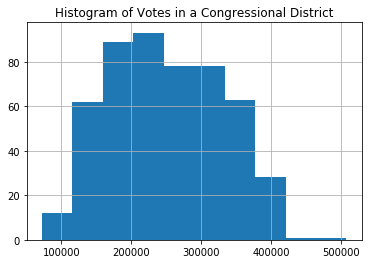

In [210]:
df_house.district_votes.hist();
plt.title('Histogram of Votes in a Congressional District');

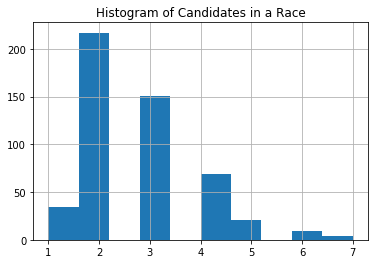

In [211]:
df_house.candidates.hist();
plt.title('Histogram of Candidates in a Race');

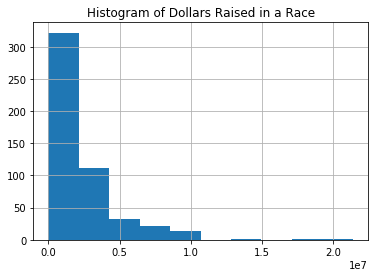

In [212]:
df_house.receipts.hist();
plt.title('Histogram of Dollars Raised in a Race');

In [213]:
#df_house[df_house.receipts =< 0.1].head()

df_house.receipts[df_house.receipts == 0.0] = 0.1

/Users/audreybaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.280207073084


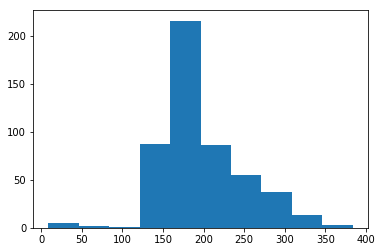

In [214]:
#getting error due to negative data
lamb=stats.boxcox_normmax(df_house.receipts, brack=(-1.9, 1.9), method='mle')
print(lamb)
df_house['receipts_t']=(np.power(df_house.disbursements,lamb)-1)/lamb

plt.hist(df_house.receipts_t);

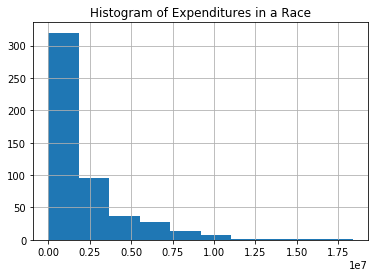

In [215]:
df_house.disbursements.hist();
plt.title('Histogram of Expenditures in a Race');

0.225828604763


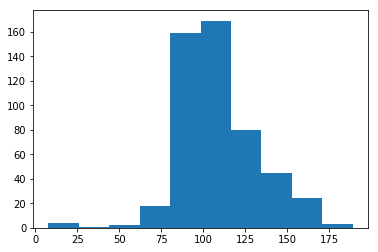

In [216]:
from scipy import stats

lamb=stats.boxcox_normmax(df_house.disbursements, brack=(-1.9, 1.9), method='mle')
print(lamb)
df_house['disbursements_t']=(np.power(df_house.disbursements,lamb)-1)/lamb

plt.hist(df_house.disbursements_t);

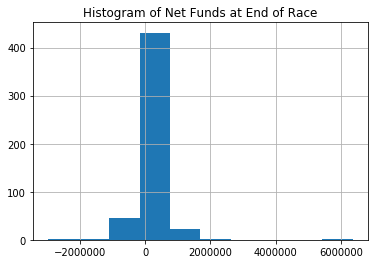

In [217]:
df_house.end_dollars.hist();
plt.title('Histogram of Net Funds at End of Race');

In [201]:
#Error from negative data 
#lamb=stats.boxcox_normmax(df_house.end_dollars, brack=(-1.9, 1.9), method='mle')
# print(lamb)
# df_house['end_dollars_t']=(np.power(df_house.end_dollars,lamb)-1)/lamb

# plt.hist(df_house.end_dollars);

In [218]:
df_house.to_pickle('df_house2reg.pickle')